In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

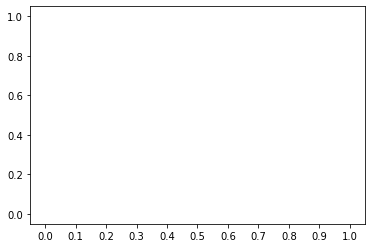

In [38]:
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=20)

Inicializando as variaveis e os arrays para manipulação dos dados.

In [39]:
infantil = 0
primario = 0
transpF = 0
transpP = 0
transfT = 0
cidade = 0
codigo_cid = []
estado_list = []
cidades_list = []
creche_list = []
infantil_list = []
primario_list = []
transpCrec_list = []
transpF_list = []
transpP_list = []
transpTT_list = []
nao_achados = 0
nao_achados_list = []
porc_creche = []
porc_infantil=[]

Lendo os arquivos que contém os dados já tratados e separado para manipulação, escola_2016 que contem os dados das 
matriculas dos alunos já separados por idade, e saeb-2017 que contem as medias da prova aplicada em 2017.

In [40]:
wrt2016 = open(
    r"C:\\Users\\André\\CursoPyLadiesSP-master\\TRABALHO\\Educacao-Infantil_X_Enade\\escola_2016.txt")

saeb2017 = open(
    r"C:\\Users\\André\\CursoPyLadiesSP-master\\TRABALHO\\Educacao-Infantil_X_Enade\\saeb-2017.csv")

Agora carregaremos os dados das escolas para amnipulação nos arrays criados anteriormente.

In [41]:
for campos in wrt2016:
    campos = campos.split(";")
    codigo_cid.append(campos[0])
    cidades_list.append(campos[1])
    estado_list.append((campos[2]))
    creche_list.append(int(campos[3]))
    infantil_list.append(int(campos[4]))
    primario_list.append(int(campos[5]))
    porc_creche.append(100 if int(campos[3])/int(campos[5])*100 > 100 else int(campos[3])/int(campos[5])*100)
    porc_infantil.append(100 if int(
        campos[4])/int(campos[5])*100 > 100 else int(campos[4])/int(campos[5])*100)
    transpCrec_list.append(int(campos[6]))
    transpF_list.append(int(campos[7]))
    transpP_list.append(int(campos[8]))
    transpTT_list.append(int(campos[9][:-1]))
wrt2016.close()

Como os dados serão contabilizados por cidade, os arrays serão iniciarão com tamanho da lista de cidades.

In [42]:
escola_qtd = [0] * len(codigo_cid)
pes_port = [0] * len(codigo_cid)
pro_port = [0] * len(codigo_cid)
pro_port_saeb = [0] * len(codigo_cid)
pes_mat = [0] * len(codigo_cid)
pro_mat = [0] * len(codigo_cid)
pro_mat_saeb = [0] * len(codigo_cid)
escola_qtd = [0] * len(codigo_cid)
qtd_alunos = [0] * len(codigo_cid)
creche = [0] * len(codigo_cid)
primario = [0] * len(codigo_cid)
preescola = [0] * len(codigo_cid)

Função criada para evitar erros na hora de icrementar as listas.

In [43]:
def flutuante(x):
    if (x == ''):
        return 0
    else:
        return float(x)

Contabilizando as medias por cidades.

In [44]:
for notas in saeb2017:
    notas = notas.split(";")
    if notas[0] in codigo_cid:
        qtd_alunos[codigo_cid.index(notas[0])] += flutuante(notas[1])
        pro_port_saeb[codigo_cid.index(notas[0])] += flutuante(notas[2])
        pro_mat_saeb[codigo_cid.index(notas[0])] += flutuante(notas[3])
        creche[codigo_cid.index(notas[0])] += flutuante(notas[4])
        preescola[codigo_cid.index(notas[0])] += flutuante(notas[5])
        primario[codigo_cid.index(notas[0])] += flutuante(notas[6])
    else:
        nao_achados += 1
        nao_achados_list.append(notas[0])


saeb2017.close()

In [48]:
dfF = pd.DataFrame({
    'Cidades': cidades_list,
    'UF': estado_list,
    'Creche': creche_list,
    'Infantil': infantil_list,
    'Primario': primario_list,
    'Matematica_Media': pro_mat_saeb,
    'Portugues_Media': pro_port_saeb,
    'Creche_X_Primario': porc_creche,
    'Infantil_X_Primario': porc_infantil
   
   
})

In [49]:
dfF.describe()



,Creche,Infantil,Primario,Matematica_Media,Portugues_Media,Creche_X_Primario,Infantil_X_Primario
count,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000
mean,309.202038,639.571942,724.434053,206.694808,205.456667,34.760834,87.804794
std,2806.426604,4285.875091,4772.828858,27.458671,26.404706,21.362761,12.895983
min,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,32.826748
25%,21.000000,68.000000,76.000000,191.955000,191.377500,19.577940,80.330894
50%,48.000000,135.500000,153.000000,207.500000,206.355000,34.220648,91.109990
75%,152.250000,366.250000,402.750000,222.082500,220.687500,48.239366,100.000000
max,104746.000000,150544.000000,165517.000000,295.190000,280.480000,100.000000,100.000000


In [63]:
dfF.sort_values(by=['Creche'],ascending=False).tail(10)

,Cidades,UF,Creche,Infantil,Primario,Matematica_Media,Portugues_Media,Creche_X_Primario,Infantil_X_Primario
733,LAMIM,MG,0,67,49,215.64,224.12,0.0,100.000000
729,DELFIM MOREIRA,MG,0,92,77,222.16,216.87,0.0,100.000000
728,PIEDADE DO RIO GRANDE,MG,0,50,57,193.24,193.51,0.0,87.719298
725,BERTOPOLIS,MG,0,72,111,200.73,205.28,0.0,64.864865
723,DOM CAVATI,MG,0,72,65,240.95,241.27,0.0,100.000000
720,CAPELA NOVA,MG,0,46,41,216.54,205.92,0.0,100.000000
716,MIRADOURO,MG,0,117,111,208.29,206.80,0.0,100.000000
711,BOM JESUS DO GALHO,MG,0,188,203,191.34,189.94,0.0,92.610837
709,MORRO DO PILAR,MG,0,38,32,193.68,189.28,0.0,100.000000
797,LASSANCE,MG,0,95,116,192.96,190.18,0.0,81.896552


Desempenho das maiores cidades da região sudeste.

In [62]:
dfF.query('Matematica_Media > 100 & Primario > 5000').tail(40).sort_values(by=['Creche_X_Primario'],ascending=False)

,Cidades,UF,Creche,Infantil,Primario,Matematica_Media,Portugues_Media,Creche_X_Primario,Infantil_X_Primario
910,PIRACICABA,SP,3909,4739,5485,204.93,205.17,71.267092,86.399271
351,TAUBATE,SP,3658,5500,5681,222.06,222.78,64.390072,96.813941
288,SAO PAULO,SP,104746,150544,165517,169.47,171.89,63.284134,90.953799
335,SAO JOSE DO RIO PRETO,SP,3440,5238,5536,209.73,212.21,62.138728,94.617052
911,RIBEIRAO PRETO,SP,4758,7730,8112,199.93,202.19,58.653846,95.290927
352,SANTOS,SP,3650,4719,6225,194.41,197.37,58.634538,75.807229
774,CAMPINAS,SP,8235,13121,14529,190.11,192.93,56.679744,90.309037
326,SOROCABA,SP,4864,8417,8619,196.14,198.90,56.433461,97.656341
770,SANTO ANDRE,SP,4989,8349,9353,193.77,197.55,53.341174,89.265476
347,PRAIA GRANDE,SP,2643,4346,5081,193.41,195.75,52.017319,85.534344


Media de proeficiencia em matematica na Região Sudeste

In [64]:
dfF['Matematica_Media'].mean()

206.69480815347723

Media de proeficiencia em português na Região Sudeste

In [65]:
dfF['Portugues_Media'].mean()

205.45666666666665

Medias das cidades que investem menos de 25% em creche.

In [81]:
dfF.query('Creche_X_Primario <25 & Primario > 1000').mean()

Creche                  569.611111
Infantil               2976.833333
Primario               3695.777778
Matematica_Media        187.730000
Portugues_Media         189.329167
Creche_X_Primario        16.491856
Infantil_X_Primario      82.280443
dtype: float64

Medias das cidades que investem entre de 25% e 50% em creche.


In [80]:
dfF.query('Creche_X_Primario > 25 & Creche_X_Primario < 50  & Primario > 1000').mean()

Creche                 1659.175926
Infantil               3530.898148
Primario               4059.787037
Matematica_Media        201.821481
Portugues_Media         202.608333
Creche_X_Primario        38.154169
Infantil_X_Primario      87.587755
dtype: float64

Medias das cidades que investem entre de 50% e 75% em creche.

In [79]:
dfF.query('Creche_X_Primario > 50 & Creche_X_Primario < 75 & Primario > 1000').mean()

Creche                 3778.538462
Infantil               5641.576923
Primario               6180.903846
Matematica_Media        203.053654
Portugues_Media         203.954423
Creche_X_Primario        59.146183
Infantil_X_Primario      91.995639
dtype: float64

Medias das cidades que investem acima de 75% em creche.

In [78]:
dfF.query('Creche_X_Primario > 75 & Primario > 1000').mean()

Creche                 2262.000000
Infantil               2706.500000
Primario               2699.500000
Matematica_Media        196.860000
Portugues_Media         195.000000
Creche_X_Primario        83.356181
Infantil_X_Primario      99.111977
dtype: float64

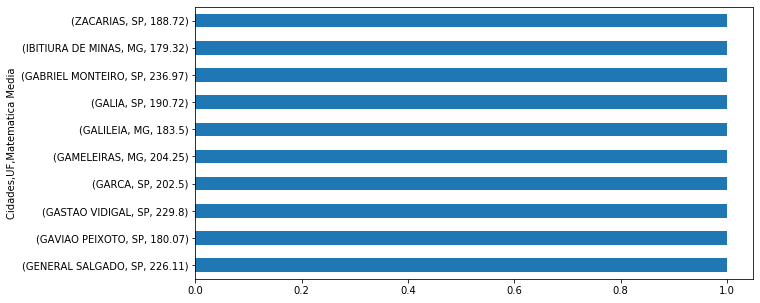

In [14]:
dfF.groupby(['Cidades','UF','Matematica Media']).size().sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10,5))

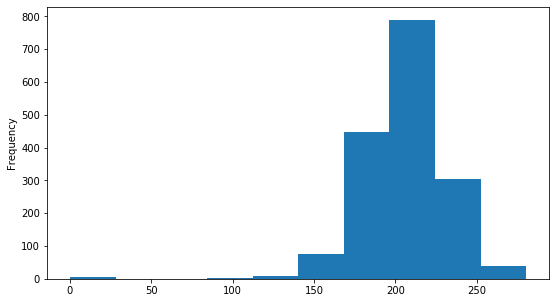

In [15]:
plt.figure(figsize = (9, 5)) 
dfF['Portugues Media'].plot(kind ="hist") 

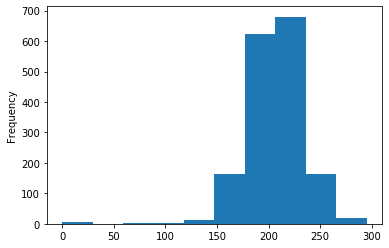

In [16]:
dfF['Matematica Media'].plot(kind ="hist") 

In [17]:
dfF.loc[dfF['Cidades'] == 'ITAPEVA']

,Cidades,UF,Creche,Infantil,Primario,Portugues Media,Matematica Media,Infantil x Primario,Creche x Primario
880,ITAPEVA,MG,51,137,130,214.55,217.55,100.00000,39.230769
1103,ITAPEVA,SP,801,1356,1735,190.10,193.06,78.15562,46.167147


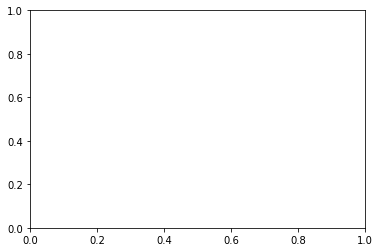

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)